# Visualisation - t-SNE and classification - neural networks

In this notebook, the MNIST dataset will be visualized with the algorithm t-SNE and neural networks.

* 0.5P for visualizing the samples
* 2P for tSNE
* 1P for applying NN
* 1P achieving an accuracy higher than 98%
* 0.5P Bonus points

## MNIST

First, load the MNIST dataset by calling [``fetch_openml(name="mnist_784", return_X_y=True)``](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) of sklearn. In the meantime, get some information about the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

In [14]:
from sklearn import datasets

mnist = datasets.fetch_openml(name="mnist_784", return_X_y=True, parser="auto")

### Visualize multiple samples of the dataset.

* Split the dataset in X, y 
* Extract one sample of the dataset e.g. ``iloc[idx].values``
* Use the function ``reshape`` to create the shape of an image (28x28 pixel).
* Use ``matplotlib.pyplot.imshow`` to visualize the image.

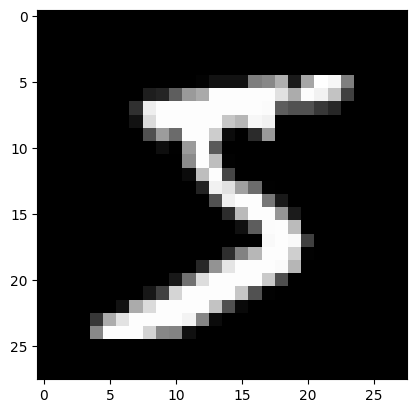

In [103]:
import matplotlib.pyplot as plt

X, y = mnist
first_image = X.iloc[0].values

image_28x28 = first_image.reshape((28, 28))
plt.imshow(image_28x28, cmap="gray")
plt.show()

### Visualize the dataset 

Apply ``TSNE`` of sklearn.manifold with the default parameters on the dataset and visualize the result. Hint: If the processing time takes too long on your computer, you can use a subset.

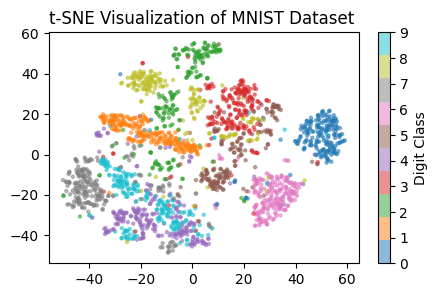

In [46]:
from sklearn.base import np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

seed = 1999

def plot_tsne(X_tsne, classes, appended_title=""):
  plt.figure(figsize=(5, 3))
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=classes, cmap='tab10', s=5, alpha=0.5)
  plt.title(f't-SNE Visualization of MNIST Dataset {appended_title}')
  plt.colorbar(scatter, ticks=range(10), label='Digit Class')
  plt.show()


tsne = TSNE(random_state=seed)
X_k, y_k = X[:2000], y[:2000]
X_tsne = tsne.fit_transform(X_k)
classes = y_k.values.astype(int)

plot_tsne(X_tsne, classes)

### Study the convergence of the algorithm

Set the perplexity parameter to 25 and try the following values for the maximum number of iterations: 250, 400, 750 and 1000. Visualize the results for each choice and describe what changes.

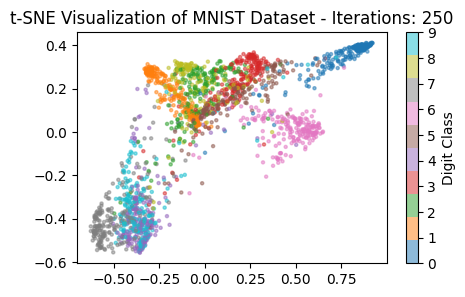

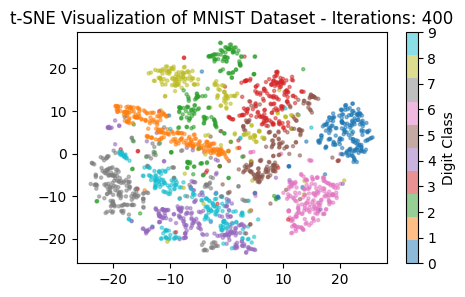

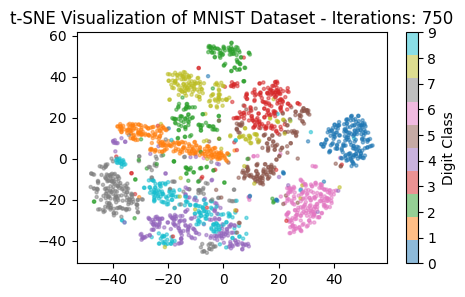

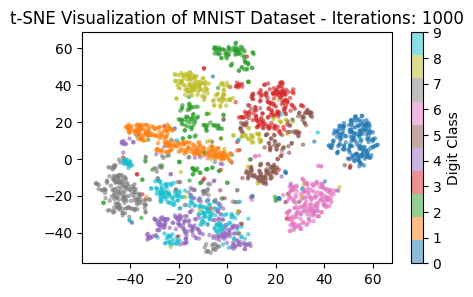

The higher the iteration count is, the better the clusters are seperated, but at higher iterations the difference to before is small.


In [47]:
iterations = [250, 400, 750, 1000]


tsne = TSNE(random_state=seed, perplexity=25, n_iter=250)
X_tsne = tsne.fit_transform(X_k)

for n_iter in iterations:
    tsne = TSNE(random_state=seed, perplexity=25, n_iter=n_iter)
    X_tsne = tsne.fit_transform(X_k)
    
    plot_tsne(X_tsne, classes, f'- Iterations: {n_iter}')

print("The higher the iteration count is, the better the clusters are seperated, but at higher iterations the difference to before is small.")

### Select the perplexity.

Try at least six different values for the perplexity parameter. Visualize the results and explain which method you think produces the best results.

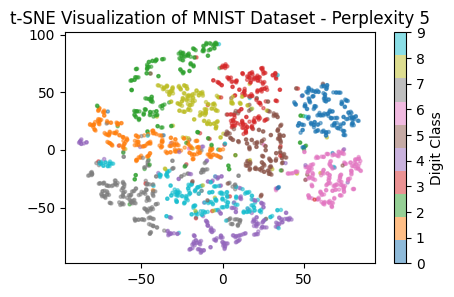

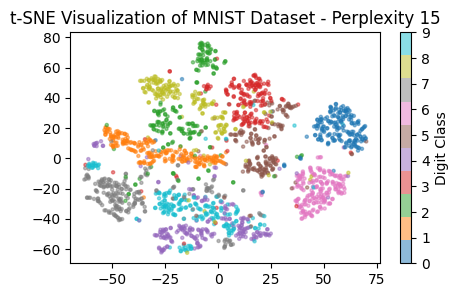

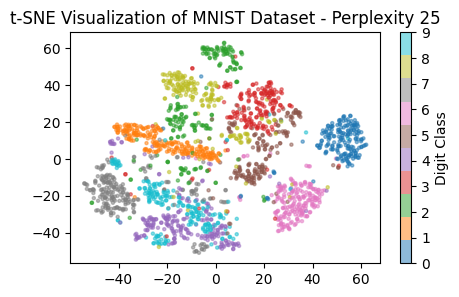

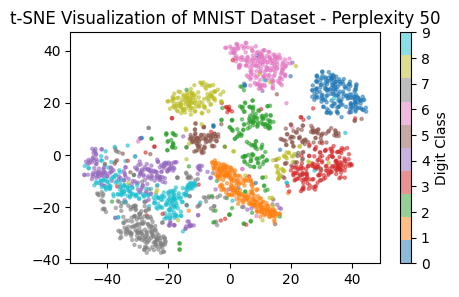

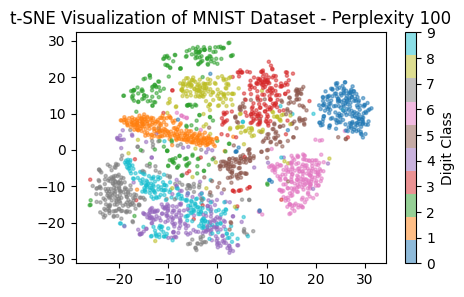

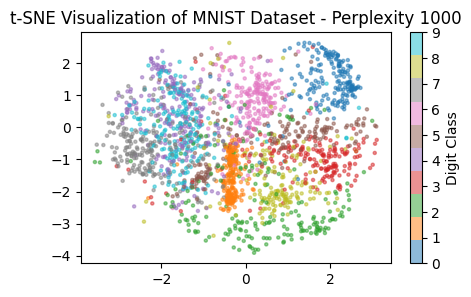

it's hard to tell which perplexity value produces the best result, but the worst results comes from perplexity = 1000
the plot with perplexity = 1000 looks just like a cloud of points, no real clusters can be detected
in my opinion the best result is produced by the values 15-50, as different clusters are more seperated and points of one cluster are more uniform
i think in general lower values will produce better results as with higher values each point will gain more neighbour points which causes cloudy results


In [49]:
perplexity_vals = [5, 15, 25, 50, 100, 1000]

for perplexity in perplexity_vals:
  tsne = TSNE(perplexity=perplexity, random_state=seed)
  X_tsne = tsne.fit_transform(X_k)
  plot_tsne(X_tsne, classes, f'- Perplexity {perplexity}')

print("it's hard to tell which perplexity value produces the best result, but the worst results comes from perplexity = 1000")
print("the plot with perplexity = 1000 looks just like a cloud of points, no real clusters can be detected")
print("in my opinion the best result is produced by the values 15-50, as different clusters are more seperated and points of one cluster are more uniform")
print("i think in general lower values will produce better results as with higher values each point will gain more neighbour points which causes cloudy results")

### Assess the stability

Run the algorithm three times with the same parameters of your choice and describe what changes.

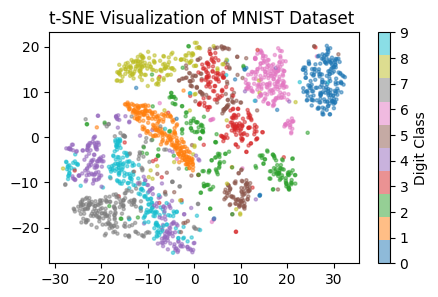

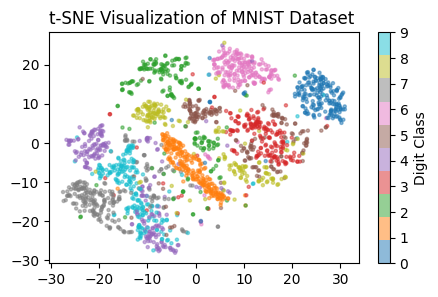

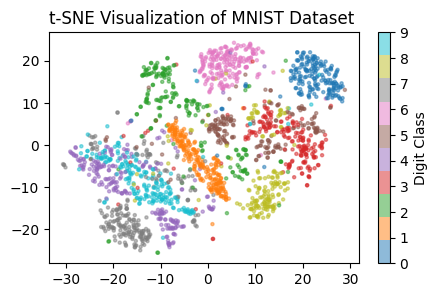

The outcome on every run is different as t-SNE is inherently stochastic. It includes some randomness at the intitialization step.


In [90]:
perplexity = 50 
n_iter = 500

for i in range(3):
  tsne = TSNE(perplexity=perplexity, n_iter=n_iter)
  X_tsne = tsne.fit_transform(X_k)

  plot_tsne(X_tsne, classes)

print("The outcome on every run is different as t-SNE is inherently stochastic. It includes some randomness at the intitialization step.")

### Create a train and test dataset of the MNIST dataset.

The train dataset should consist of 60.000 samples and the dataset of 10.000 samples.

In [39]:
from sklearn.model_selection import train_test_split
X, y = mnist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=seed)

print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


### Train neural network and evaluate it by measuring the accuracy based on the test dataset.

* Scale the features to be in the range [0,1]. 
* Train the model with [``from sklearn.neural_network import MLPClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
* Try to achieve an accuracy of more than 98% on the test set.

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, alpha=0.1, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

if accuracy > 0.98:
    print("accuracy > 98%")
else:
    print("accuracy <= 98%")

Accuracy on the test set: 98.13%
accuracy > 98%


### Apply a Convolutional Neural Network on the dataset (Bonus Points!)

Tutorial [CNN on MNIST](https://medium.com/@jaredmcmullen1/developing-a-simple-cnn-for-mnist-f98c38f0d38d)

Can you achieve a higher accuracy with Convolutional Neural Network than with the MPLclassifier?

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 10)


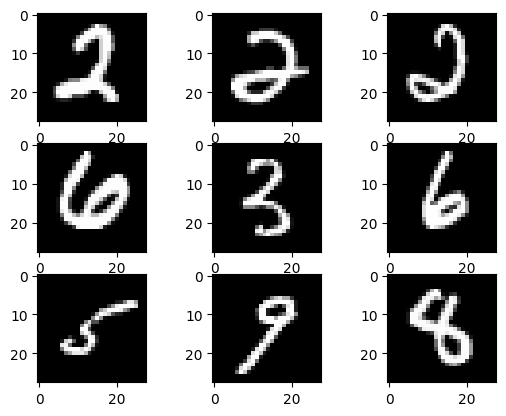

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1600)             

In [40]:
import numpy as np
from keras import layers
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

seed = 1999

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_sr = X_train_scaled.reshape((X_train_scaled.shape[0], 28, 28))
X_test_sr = X_test_scaled.reshape((X_test_scaled.shape[0], 28, 28))

x_train = np.expand_dims(X_train_sr, -1)
x_test = np.expand_dims(X_test_sr, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)

for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [41]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(x_train.shape)
print(y_train.shape)

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/15
422/422 [==============================] - 18s 43ms/step - loss: 0.3562 - accuracy: 0.8916 - val_loss: 0.1020 - val_accuracy: 0.9672
Epoch 2/15
422/422 [==============================] - 23s 53ms/step - loss: 0.1124 - accuracy: 0.9654 - val_loss: 0.0685 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 23s 54ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 0.0584 - val_accuracy: 0.9813
Epoch 4/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.0568 - val_accuracy: 0.9838
Epoch 5/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0466 - val_accuracy: 0.9843
Epoch 6/15
422/422 [==============================] - 22s 51ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0454 - val_accuracy: 0.9847
Epoch 7/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0500 - accuracy: 0.9846 - v

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("yes, achieved higher accuracy than with MPL")
print(f"Accuracy on the test set: {score[1] * 100:.2f}%")

Test loss: 0.03008175641298294
Test accuracy: 0.991599977016449
yes, achieved higher accuracy than with MPL
Accuracy on the test set: 99.16%
